<a href="https://colab.research.google.com/github/tahmed-vassar/FruitVegetableDetection/blob/main/Doc2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

In [4]:
!gdown https://drive.google.com/uc?id=1wHRVN7l6quMFTG7seVS0pHh7ULrc78ug

Downloading...
From: https://drive.google.com/uc?id=1wHRVN7l6quMFTG7seVS0pHh7ULrc78ug
To: /content/processed_dataframe.csv
100% 180M/180M [00:01<00:00, 117MB/s]


In [11]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from ast import literal_eval

df = pd.read_csv('processed_dataframe.csv')

df.drop('Unnamed: 0', axis = 1, inplace = True)

for col in ['unigrams', 'sentences', 'lem_sent','genres']:
  df[col] = df[col].apply(literal_eval)

df

,summary,unigrams,sentences,lem_sent,genres
0,"Set in the second half of the 22nd century, th...","[set, second, half, 22nd, century, film, depic...","[Set in the second half of the 22nd century, t...","[[set, second, half, 22nd, century, film, depi...","[action, adventure, thriller, horror, science ..."
1,"Adam, a San Francisco-based artist who works a...","[adam, san, francisco, base, artist, work, cab...","[Adam, a San Francisco-based artist who works ...","[[adam, san, francisco, base, artist, work, ca...","[drama, comedy, romance]"
2,The story starts as one of the robots flies i...,"[story, start, robot, fly, scientist, secret, ...",[ The story starts as one of the robots flies ...,"[[story, start, robot, fly, scientist, secret,...","[action, adventure, family, short film, scienc..."
3,The film opens with Mary Poppins perched in a...,"[film, open, mary, poppins, perch, cloud, high...",[The film opens with Mary Poppins perched in ...,"[[film, open, mary, poppins, perch, cloud, hig...","[drama, comedy, family, fantasy]"
4,A young 20-year-old named Jody lives with his...,"[young, 20, year, old, name, jody, live, mothe...",[A young 20-year-old named Jody lives with hi...,"[[young, 20, year, old, name, jody, live, moth...","[drama, crime]"
...,...,...,...,...,...
16604,Kalai Arasi' is a well-blended story of romanc...,"[kalai, arasi, blend, story, romance, science,...",[Kalai Arasi' is a well-blended story of roman...,"[[kalai, arasi, blend, story, romance, science...","[drama, action, romance, science fiction]"
16605,Jennifer Haines is an up-and-coming Chicago a...,"[jennifer, haines, come, chicago, attorney, wi...",[Jennifer Haines is an up-and-coming Chicago ...,"[[jennifer, haines, come, chicago, attorney], ...","[crime, thriller]"
16606,Kishan killed a man in his childhood when the...,"[kishan, kill, man, childhood, man, abuse, mot...",[Kishan killed a man in his childhood when th...,"[[kishan, kill, man, childhood, man, abuse, mo...","[drama, comedy, action, crime]"
16607,{{plot}} The film opens with a Great Western e...,"[plot, film, open, great, western, express, sp...",[{{plot}} The film opens with a Great Western ...,"[[plot, film, open, great, western, express, s...","[comedy, crime, thriller]"


In [19]:
df[:4]

,summary,unigrams,sentences,lem_sent,genres
0,"Set in the second half of the 22nd century, th...","[set, second, half, 22nd, century, film, depic...","[Set in the second half of the 22nd century, t...","[[set, second, half, 22nd, century, film, depi...","[action, adventure, thriller, horror, science ..."
1,"Adam, a San Francisco-based artist who works a...","[adam, san, francisco, base, artist, work, cab...","[Adam, a San Francisco-based artist who works ...","[[adam, san, francisco, base, artist, work, ca...","[drama, comedy, romance]"
2,The story starts as one of the robots flies i...,"[story, start, robot, fly, scientist, secret, ...",[ The story starts as one of the robots flies ...,"[[story, start, robot, fly, scientist, secret,...","[action, adventure, family, short film, scienc..."
3,The film opens with Mary Poppins perched in a...,"[film, open, mary, poppins, perch, cloud, high...",[The film opens with Mary Poppins perched in ...,"[[film, open, mary, poppins, perch, cloud, hig...","[drama, comedy, family, fantasy]"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


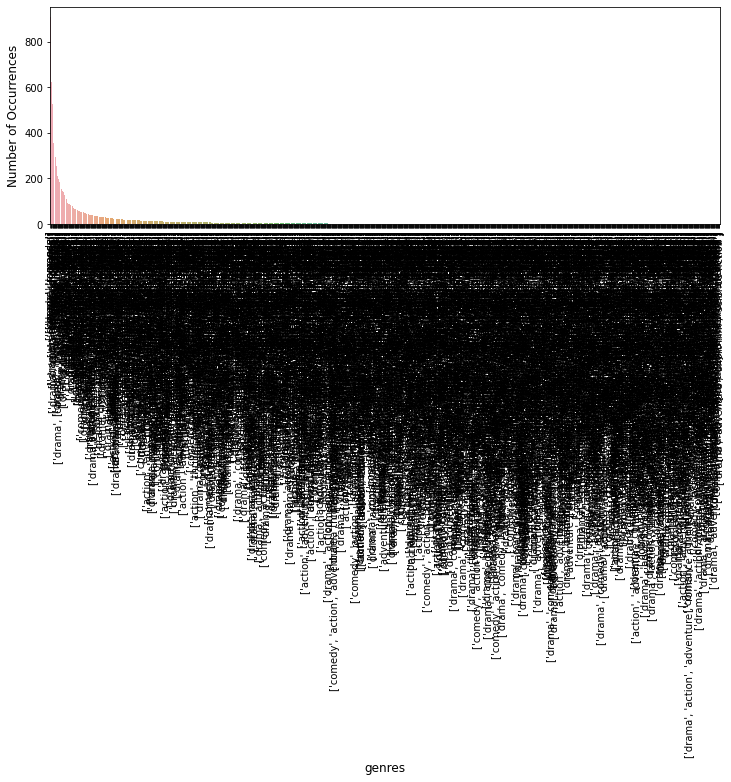

In [ ]:
cnt_pro = df['genres'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('genres', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [20]:
train, test = train_test_split(df, test_size=0.25, random_state=42)

# train[:4]

train_tagged = train.apply(
    lambda r: TaggedDocument(words=r['unigrams'], tags=r.genres), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=r['unigrams'], tags=r.genres), axis=1)

train_tagged.values[0].tags

['comedy', 'romance']

In [21]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

2

In [22]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 12456/12456 [00:00<00:00, 1693163.42it/s]


In [24]:
for epoch in range(12):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 12456/12456 [00:00<00:00, 2470878.29it/s]


In [25]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors
    
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [26]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

# for df_trunc:
# Testing accuracy 0.07692307692307693
# Testing F1 score: 0.11538461538461539
# /usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Testing accuracy 0.5335901757765471
Testing F1 score: 0.40569130619840965


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
from sklearn.metrics import jaccard_score 
jacc = jaccard_score(y_test, y_pred, average='weighted')

print(f"jaccard score is {jacc}")


jaccard score is 0.3046587247443531


In [36]:
print(y_pred[:1000])

['drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'comedy' 'drama' 'drama'
 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'drama' 'drama' 'drama' 'comedy' 'drama' 'drama' 'drama' 'drama'
 'drama' 'drama' 'comedy' 'drama' 'drama' 'drama' 'comedy' 'drama' 'drama'
 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'comedy' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'comedy' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'comedy' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'comedy' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'drama' 'comedy' 'drama' 'drama' 'drama' 'drama' 'drama' 'drama'
 'drama' 'drama' 'drama' 'drama' 'drama' '